In [7]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create

# reading the dataset
df = pd.read_csv(r'C:\Users\johan\os\Portofolio\movies.csv')

In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# quick look on the data
df.info()
# as we could see here there are several missing value in the dataset, the only column without missing value is the name, genre, year, and director

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Data Cleaning

In [13]:
# now we are going to check how many missing value in each column
df.isna().sum()
# as we could see there are lots of missing value in the dataset, and the budget column have the most missing value

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

<AxesSubplot:>

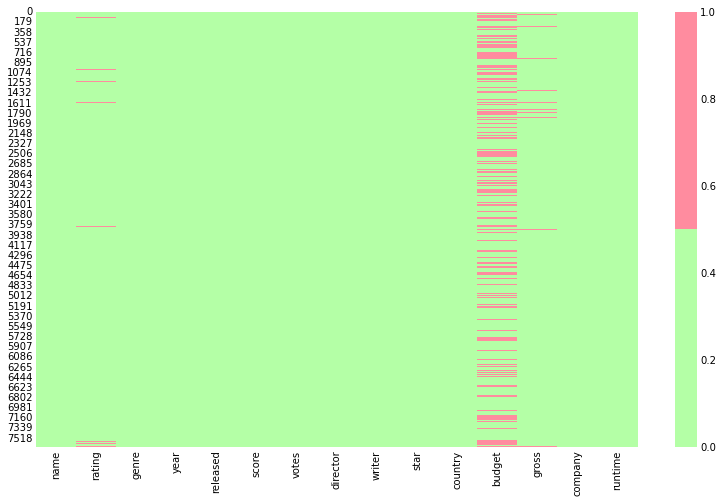

In [14]:
# I am going to visualize the missing data
cols = df.columns[:]
colours = ['#b4ffa6', '#ff8c9f'] # the red one will be the missing values
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))
# a lot of missing value is visible in the budget, but little in rating and gross

<AxesSubplot:>

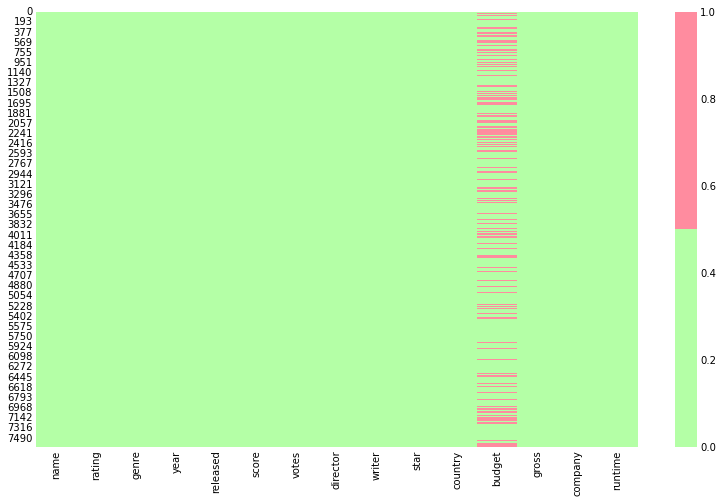

In [16]:
# since in the gross and rating the missing value is not too high
# therefore I will delete all the rows with the missing value including all the column with few missing value
df_less_missing = df.dropna(subset = ['rating', 'released', 'score','votes', 'writer', 'star', 'country', 'gross', 'company', 'runtime'])
# we will still keep the missing value in the budget since it is quite a lot

# double checking the dataset if there is still a visible missing value
sns.heatmap(df_less_missing[cols].isnull(), cmap = sns.color_palette(colours)) # the red will be the missing value

In [17]:
# then we will check if there is duplication in the dataset
sum(df_less_missing.duplicated())
# it is confirmed that there is no duplication in the dataset

0

In [35]:
# changing the data types of budget and gross column
df_less_missing['gross'] = df_less_missing['gross'].astype('int64')
df_less_missing['runtime'] = df_less_missing['runtime'].astype('int64')

# we could double check if the dataset already changed
df_less_missing.head()

C:\Users\johan\AppData\Local\Temp/ipykernel_33864/3167951078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less_missing['gross'] = df_less_missing['gross'].astype('int64')
C:\Users\johan\AppData\Local\Temp/ipykernel_33864/3167951078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less_missing['budget'] = df_less_missing['budget'].astype('float64')
C:\Users\johan\AppData\Local\Temp/ipykernel_33864/3167951078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98


Visualization

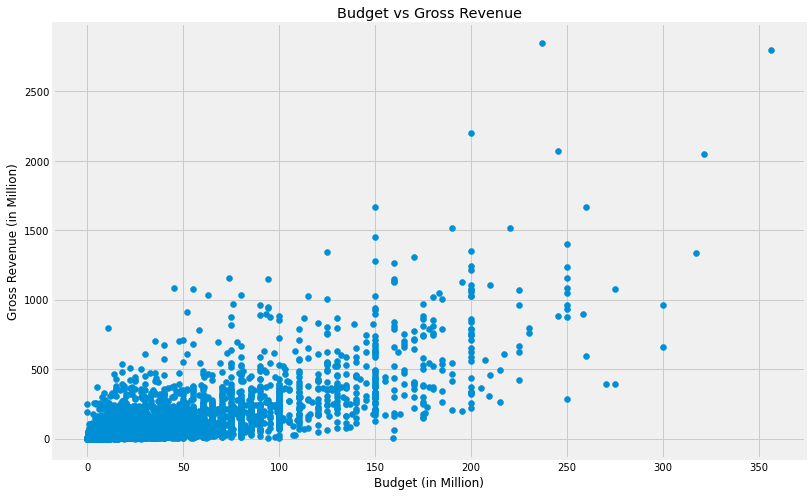

In [38]:
# scatter plot with budget vs gross
plt.scatter(df_less_missing['budget']/1000000, df_less_missing['gross']/1000000)
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (in Million)')
plt.ylabel('Gross Revenue (in Million)')
plt.show()

C:\Users\johan\Anaconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross Revenue')

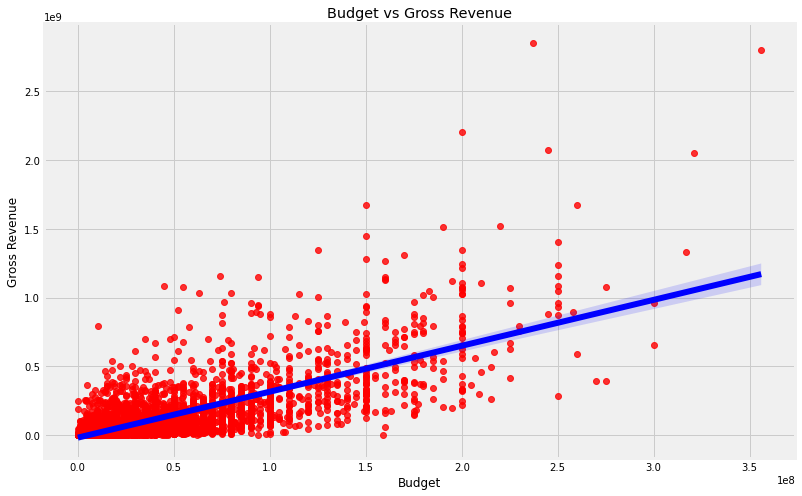

In [43]:
# plot budget and gross using seaborn
sns.regplot('budget','gross', df_less_missing, scatter_kws = {'color':'red'}, line_kws = {'color': 'blue'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

In [44]:
# checking on the correlation
df_less_missing.corr()
# there are three method for finding correlation = pearson, kendall, spearman
# the default method to be used in jupyter is pearson 

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.327722,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.072001,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.439675,0.631110,0.309945
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.258826,0.188071,0.631110,0.740247,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.318695,0.245117,1.000000


Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

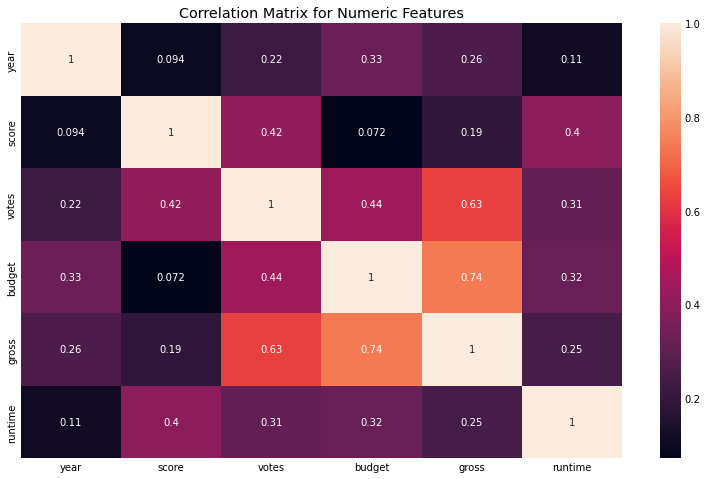

In [45]:
# since it's kinda hard to read the matrix above, we are going to visualize the correlation
sns.heatmap(df_less_missing.corr(), annot = True)
plt.title('Correlation Matrix for Numeric Features')

In [46]:
# since there are several column that the dtype are object, we could change every non-numerical column into numerical
# first we need to differentiate the column with the object type
obj = df_less_missing.columns[(df_less_missing.dtypes == 'object').values].tolist()
obj

['name',
 'rating',
 'genre',
 'released',
 'director',
 'writer',
 'star',
 'country',
 'company']

In [47]:
# now we could change the non-numerical column into numerical column by scikit
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in obj:
    df_less_missing[i] = LE.fit_transform(df_less_missing[i])
df_less_missing.head()

C:\Users\johan\AppData\Local\Temp/ipykernel_33864/1368625724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less_missing[i] = LE.fit_transform(df_less_missing[i])


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6372,6,6,1980,1654,8.4,927000.0,2471,3851,979,52,19000000.0,46998772,2179,146
1,5373,6,1,1980,1445,5.8,65000.0,2169,1564,306,53,4500000.0,58853106,686,104
2,4956,4,0,1980,1718,8.7,1200000.0,1063,2464,1642,53,18000000.0,538375067,1446,124
3,277,4,4,1980,1445,7.7,221000.0,1248,1920,2112,53,3500000.0,83453539,1697,88
4,993,6,4,1980,1494,7.3,108000.0,1010,499,387,53,6000000.0,39846344,1665,98


Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

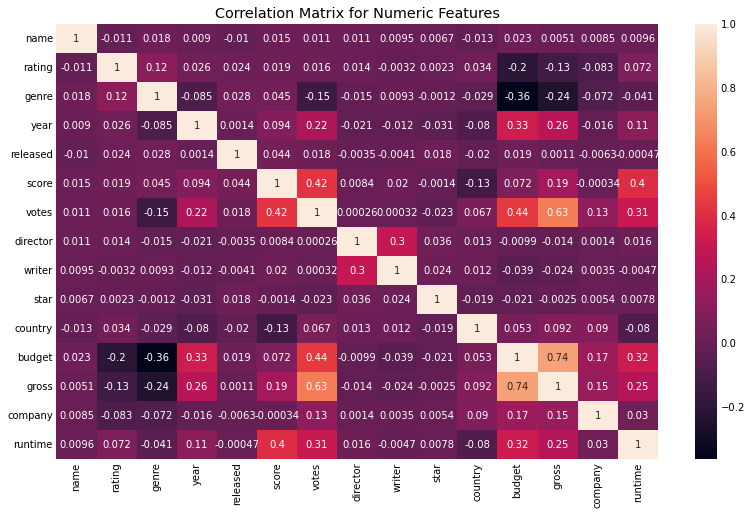

In [48]:
# Now after change the non-numerical colum into numerical, we could put them into the correlation matrix
sns.heatmap(df_less_missing.corr(), annot = True)
plt.title('Correlation Matrix for Numeric Features')

As we could see from the correlation matrix, that the highest correlation are gross and budget, with 0.74 correlation.
And the runner up for the highest correlation are votes and gross with 0.63 correlation.